In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
#importing dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Checking whether dataset is Null
data.isnull == True

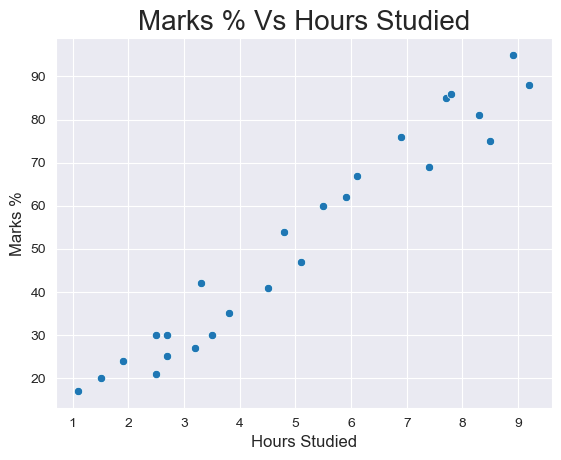

In [5]:
#scatterplot for scores distribution
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks % Vs Hours Studied',size=20)
plt.ylabel('Marks %', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [13]:
#Training model
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [14]:
#Splitting dataset
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [15]:
#Fitting data into model
regression = LinearRegression()  
regression.fit(train_X, train_y)
print("Trained")

Trained


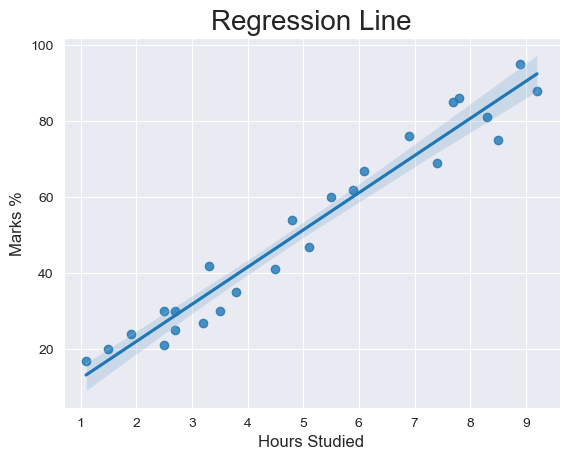

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
#Regression plot
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Line',size=20)
plt.ylabel('Marks %', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())


In [17]:
# Prediccting Marks %
print(val_X)
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [18]:
#comparing predicted marks vs actual marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


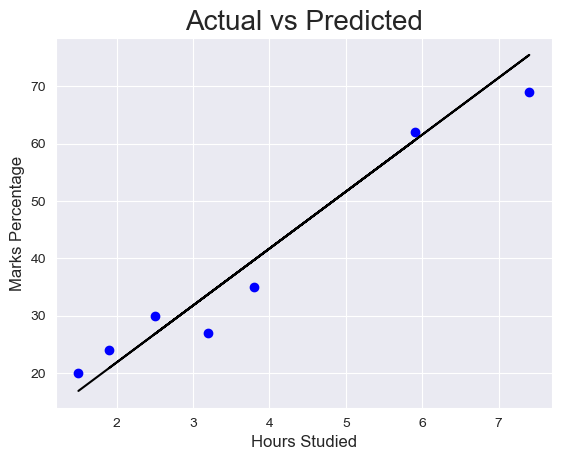

In [19]:
#Scatterplot for predicted vs actual marks
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [20]:
# Calculating the accuracy
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


In [21]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
